# Prediction Prototype Algorithm


In [1]:
## Importing important libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=30)
matplotlib.rcParams.update({'font.size': 28})
import math
import datetime as dt
import os
import sys


## ML Models import
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import linear_model

## Utility Functions

In [39]:

## Visulalization function 
def Visualize(dataset,List_of_count_to_print,title1,ylab,vx=50,vy=30,w=.80):
    df = dataset
    n = 0
    for i in List_of_count_to_print:
        filter1 = df['Country'] == i
        df = df[filter1]
        labels = df['Date']
        conf = df['Confirmed']
        Recov = df['Recovered']
        Death = df['Deaths']
        
        #high = max(conf)
        #low = min(conf)
        
        x = np.arange(len(labels))  # the x label locations 
        width = w  # the width of the bars
        fig, ax = plt.subplots(figsize=(vx,vy))
        rects1 = ax.bar(x - width, conf, width, label='confirmed')
        rects2 = ax.bar(x , Recov, width, label='Recovered')
        rects3 = ax.bar(x + width , Death, width, label='Death')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel(ylab)
        ax.set_title(title1)
        ax.set_xticks(x)
        plt.xticks(rotation=90) 
        #plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
        ax.set_xticklabels(labels)
        ax.legend()
        n  = n + 1
    
    
    plt.show()
    
## function to Check the List of Countries avaialable
def count_avalaible(dataframe,country_coul_rep = 'Country'):
    x = 0
    for i in set(dataframe.loc[:,country_coul_rep]):
        print(i,end=' | ')
        x = x + 1
        if(x > 6):
            x = 0
            print()
    print("\n\n##Total No of Countries = " + str(len(set(dataframe.loc[:,country_coul_rep]))))
    
    
## Function for Cluster Plotting 

def plot_cluster(data_frame,title,xlabel,ylabel):
    g1x = []
    g1y = []
    g2x = []
    g2y = []
    g3x = []
    g3y = []
    g4x = []
    g4y = []
    g5x = []
    g5y = []

    for i,j,k in data_frame:
        if(k == 0):
            g1x.append(i)
            g1y.append(j)
        elif(k==1):
            g2x.append(i)
            g2y.append(j)
        elif(k==2):
            g3x.append(i)
            g3y.append(j)
        elif(k==3):
            g4x.append(i)
            g4y.append(j)
        elif(k==4):
            g5x.append(i)
            g5y.append(j)



    data = [(g1x,g1y), (g2x,g2y), (g3x,g3y), (g4x,g4y), (g5x,g5y)]
    colors = ("red", "green", "blue","yellow",'purple')
    groups = ("Sever1", "Sever2", "Sever3","Sever4","Sever5")

    # Create plot
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, facecolor = "1.0")

    for data, color, group in zip(data, colors, groups):
        print(data)
        t = data
        x , y = t
        ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=100, label=group)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.title(title)
    plt.legend(loc=2,prop={"size":10})
    plt.show()
    
    

# Creating Data Frames for Already Processed DataSets

In [3]:
Covid_19_Countires_Wise = pd.read_csv('../../Covid-19-Data(selected-dataset)/countries-aggregated.csv')
Blood_Pressure_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Blood_Pressure_Countires_Wise_Processed.csv')
Diabetes_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Diabetes_Countires_Wise_Processed.csv')
HIV_Countires_Wise = pd.read_csv('../Pre_Processed_Data/HIV_Countires_Wise_Processed.csv')
Medical_Expending_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Medical_Expending_Countires_Wise_Processed.csv')
Population_Data_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Population_Data_Countires_Wise_Processed.csv')
Tuber_Culosis_Countires_Wise = pd.read_csv('../Pre_Processed_Data/Tuber_Culosis_Countires_Wise_Processed.csv')

## Removing extra Unnamed:0 columns created during file storage 

Blood_Pressure_Countires_Wise = Blood_Pressure_Countires_Wise.drop(['Unnamed: 0'],axis=1)
Diabetes_Countires_Wise = Diabetes_Countires_Wise.drop(['Unnamed: 0'],axis=1)
HIV_Countires_Wise = HIV_Countires_Wise.drop(['Unnamed: 0'],axis=1)
Medical_Expending_Countires_Wise = Medical_Expending_Countires_Wise.drop(['Unnamed: 0'],axis=1)
Population_Data_Countires_Wise = Population_Data_Countires_Wise.drop(['Unnamed: 0'],axis=1)
Tuber_Culosis_Countires_Wise = Tuber_Culosis_Countires_Wise.drop(['Unnamed: 0'],axis=1)


## 1. Covid_19_Countires_Wise Analysis

## Data Preprocessing

In [4]:
data = np.array(Covid_19_Countires_Wise)
date_range = data[:,0]
Country_name = data[:,1]
time_series_data = data[:,[2,3,4]]
print(time_series_data)

Xs = time_series_data

n = len(set(list(data[:,0])))
print(n)

[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [1869 1013 530]
 [9343 8412 260]
 [5261 2092 132]]
208


## Creating Time Series model

In [5]:
## No of days data collected so far
n = len(set(list(data[:,0])))

def time_series_forecaste(data,pred):
    fix_latest_data = np.amax(data,axis=0)[0]
    w1 = []
    fix_latest_data = np.datetime64(fix_latest_data) + np.timedelta64(1,'D')
    predict_frame = np.zeros(shape=(1,5)) 
    filter1 = []
    #latest_data = type(dt.datetime(latest_data))
    countries = set(list(data[:,1]))
    p = 0
    x = 0 
    for i in countries:
        latest_data = fix_latest_data
        filter1.clear()
        p = p + 1
        completed = (p/len(countries))*100
        if(p == n/4 or p == n/2 or p == (n*3)/4 or p == n):
            print(f'% completed = {completed}', flush=True)
        count = pred
        
        for j in range(0,len(data[:,0])):
            if(data[j,1] == i):
                filter1.append(True)
            else:
                filter1.append(False)
        data2 = data[filter1]
        w1.clear()
        for j in range(0,len(data2[:,0])):
            if(data2[j,1] == i):
                x = x + 1
                
                for k in range(len(data2[:,[2]])):
                    w1.append((len(data2[:,[2]])- k)/len(data2[:,[2]]))
                
                count = count - 1
                val1 = ((sum(data2[:,2]*w1))/len(data2[:,[2]]))
                val2 = ((sum(data2[:,3]*w1))/len(data2[:,[3]]))
                val3 = ((sum(data2[:,4]*w1))/len(data2[:,[4]]))
                predict_frame = np.append(predict_frame,[str(latest_data),str(i),str(int(val1)),str(int(val2)),str(int(val3))])
                predict_frame = predict_frame.reshape((int(len(predict_frame)/5)),5)
                latest_data = np.datetime64(latest_data) + np.timedelta64(1,'D')
                data2 = np.append(data2,[str(latest_data),str(i),int(val1),int(val2),int(val3)])
                data2 = data2.reshape((int(len(data2)/5)),5)
                data2[:,[2,3,4]] = data2[:,[2,3,4]].astype(np.int)
                w1.clear()
                if(count < 0):
                    break
    new_val = pd.DataFrame(predict_frame[1:,[0,1,2,3,4]])
    new_val = new_val.rename(columns = {0:'Date',1:'Country',2:'Confirmed',3:'Recovered',4:'Deaths'}, inplace = False)
    print('  completed Succesfully ', flush=True)
    return new_val
                
No_of_days_to_predict_in_future = 15         
val123 = time_series_forecaste(data,No_of_days_to_predict_in_future) 


#val123  # Unocment to diplay the frame structure



% completed = 27.659574468085108
% completed = 55.319148936170215
% completed = 82.97872340425532
  completed Succesfully 


In [6]:
val = np.array(val123)
val[:,[2]].astype(np.int)
w1 = []
for i in range(len(val[:,[2]])):
    w1.append((len(val[:,[2]])-i)/len(val[:,[2]]))
#print(val[:,[2]].astype(np.int))    
#print(val[:,[2]].astype(np.int)*w1)
#val[:,[2]].astype(np.int)*(val[:,[2]].astype(np.int)/63794)

In [7]:
Complete_Data = val123
filter1 = val123['Country'] == 'US'
val123 = val123[filter1]
# val123 # Uncomment to view frame structure

## Visualize Covid-19 Time Series Predictions

In [8]:
#print(Covid_19_Countires_Wise)
#Visualize(val123, 
 #         ['US'],'Spread of Covid 19','No of Patients in (millions)',vx=50,vy=25,w=.3)

## Prediction Prototype Algorithm

In [9]:
countries = ['Afghanistan','Italy' , 'Kuwait', 'India' , 'US', 'South Africa' , 
             'United Kingdom','Sri Lanka', 'Chile' , 'Norway', 'New Zealand' ,'Switzerland', 
'Australia', 'Canada', 'China','Slovenia','North Macedonia']


In [10]:
Complete_Data


Date  Country Confirmed Recovered Deaths
0     2020-08-17   Poland      4217      1942    180
1     2020-08-18   Poland      4263      1973    182
2     2020-08-19   Poland      4308      2004    184
3     2020-08-20   Poland      4352      2035    186
4     2020-08-21   Poland      4395      2064    187
...          ...      ...       ...       ...    ...
3003  2020-08-28  Hungary       710       324     87
3004  2020-08-29  Hungary       714       327     88
3005  2020-08-30  Hungary       718       330     88
3006  2020-08-31  Hungary       721       332     89
3007  2020-09-01  Hungary       725       335     89

[3008 rows x 5 columns]

In [11]:
# Covid Data 
Complete_Data = np.array(Complete_Data)
Complete_Data[:,[2,3,4]] = np.array(Complete_Data[:,[2,3,4]]).astype(int)
selected_countries = np.zeros(shape=(1,4)) 
data = Complete_Data[:,[0,1,2,3,4]]
filter1 = []
for i in countries:
    filter1.clear()
    for j in range(0,len(data[:,0])):
            if(data[j,1] == i):
                filter1.append(True)
            else:
                filter1.append(False)
    Complete_Data = data[filter1]
    for j in range(0,len(Complete_Data[:,0])):
                if(Complete_Data[j,1] == i):
                
                    '''for k in range(0,len(Complete_Data[:,[2]])):
                        w1.append((len(Complete_Data[:,[2]])- k)/len(Complete_Data[:,[2]]))
                                                                                            '''
                    val1 = ((sum(Complete_Data[:,2]))/len(Complete_Data[:,[2]]))
                    val2 = ((sum(Complete_Data[:,3]))/len(Complete_Data[:,[3]]))
                    val3 = ((sum(Complete_Data[:,4]))/len(Complete_Data[:,[4]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2),int(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries   = selected_countries[1:,[0,1,2,3]]


print(selected_countries[:,[0,1,2,3]])



[['Afghanistan' '2755' '1024' '68']
 ['Italy' '51177' '25973' '6935']
 ['Kuwait' '4570' '3053' '33']
 ['India' '60938' '35401' '1603']
 ['US' '368743' '85577' '18788']
 ['South Africa' '15635' '8758' '266']
 ['United Kingdom' '46880' '220' '6876']
 ['Sri Lanka' '262' '159' '1']
 ['Chile' '24055' '17942' '436']
 ['Norway' '1959' '784' '46']
 ['New Zealand' '337' '265' '3']
 ['Switzerland' '7177' '5305' '382']
 ['Australia' '1853' '1261' '21']
 ['Canada' '15881' '8720' '1130']
 ['China' '34793' '26471' '1532']
 ['Slovenia' '357' '172' '20']
 ['North Macedonia' '675' '333' '32']]


In [12]:
#clustering = DBSCAN(eps=300, min_samples=5).fit(selected_countries[:,[1,2,3]])
clustering = KMeans(n_clusters=5, random_state=0).fit(selected_countries[:,[1,2,3]])
clustering.labels_
clus = list(clustering.labels_)
covid_frame = list(zip(countries,clus))
print(covid_frame)
covid_frame1 = list(zip(selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
print(covid_frame1)

[('Afghanistan', 3), ('Italy', 2), ('Kuwait', 3), ('India', 2), ('US', 1), ('South Africa', 0), ('United Kingdom', 4), ('Sri Lanka', 3), ('Chile', 0), ('Norway', 3), ('New Zealand', 3), ('Switzerland', 3), ('Australia', 3), ('Canada', 0), ('China', 2), ('Slovenia', 3), ('North Macedonia', 3)]
[(['1024'], ['68'], 3), (['25973'], ['6935'], 2), (['3053'], ['33'], 3), (['35401'], ['1603'], 2), (['85577'], ['18788'], 1), (['8758'], ['266'], 0), (['220'], ['6876'], 4), (['159'], ['1'], 3), (['17942'], ['436'], 0), (['784'], ['46'], 3), (['265'], ['3'], 3), (['5305'], ['382'], 3), (['1261'], ['21'], 3), (['8720'], ['1130'], 0), (['26471'], ['1532'], 2), (['172'], ['20'], 3), (['333'], ['32'], 3)]


[['1024'], ['25973'], ['3053'], ['35401'], ['85577'], ['8758'], ['220'], ['159'], ['17942'], ['784'], ['265'], ['5305'], ['1261'], ['8720'], ['26471'], ['172'], ['333']]


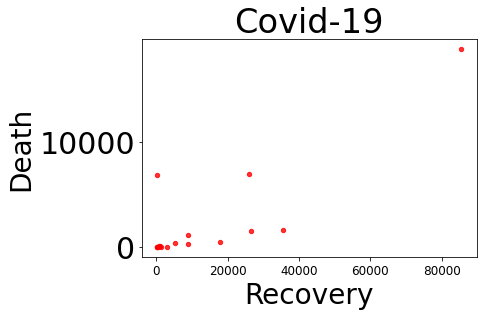

In [13]:
# Plotting Clusters

area = np.pi*6
x = selected_countries[:,[2]].tolist()
y = selected_countries[:,[3]].tolist()
print(x)
# Plot
plt.scatter(x, y, s=area, c='red', alpha=0.8)
plt.title('Covid-19')
plt.xlabel('Recovery')
plt.ylabel('Death')
plt.show()

([['8758'], ['17942'], ['8720']], [['266'], ['436'], ['1130']])
([['85577']], [['18788']])
([['25973'], ['35401'], ['26471']], [['6935'], ['1603'], ['1532']])
([['1024'], ['3053'], ['159'], ['784'], ['265'], ['5305'], ['1261'], ['172'], ['333']], [['68'], ['33'], ['1'], ['46'], ['3'], ['382'], ['21'], ['20'], ['32']])
([['220']], [['6876']])


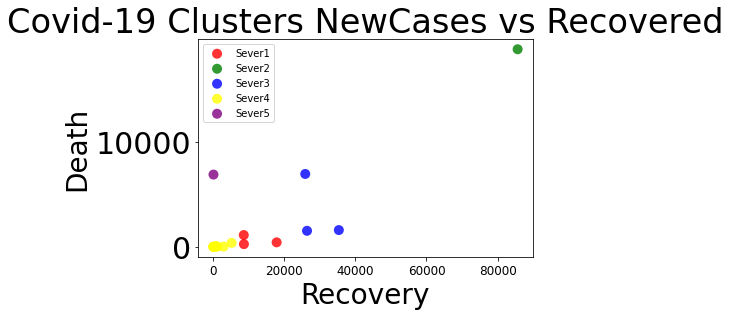

In [41]:
# Visulaize  Clusters 
title = 'Covid-19 Clusters NewCases vs Recovered'
xlabel = 'Recovery'
ylabel = 'Death'
plot_cluster(covid_frame1,title,xlabel,ylabel)

# Co-morbidities Dataframe Clustering

In [15]:
countries = ['Afghanistan','Italy' , 'Kuwait', 'India' , 'US', 'South Africa' , 
             'United Kingdom','Sri Lanka', 'Chile' , 'Norway', 'New Zealand' ,'Switzerland', 
'Australia', 'Canada', 'China','Slovenia','North Macedonia','Bolivia']

In [16]:
## Check the List of Countries avaialable
#HIV_Countires_Wise = pd.read_csv('../HIV infected Population/Data_Extract_From_Health_Nutrition_and_Population_Statistics/c600116a-af72-4faa-945a-ab00ddddb96e_Data.csv')

## Columns renaming for Uniformity

#------------------------------------------------------------
HIV_Countires_Wise_complete = HIV_Countires_Wise
# Covid Data 
HIV_Countires_Wise_complete = np.array(HIV_Countires_Wise_complete)
HIV_Countires_Wise_complete[:,[2,3,4]] = np.array(HIV_Countires_Wise_complete[:,[2,3,4]]).astype(int)
selected_countries = np.zeros(shape=(1,4)) 
data_hiv = HIV_Countires_Wise_complete[:,[0,1,2,3,4]]
filter2 = []
for i in countries:
    filter2.clear()
    for j in range(0,len(data_hiv[:,0])):
            if(data_hiv[j,0] == i):
                filter2.append(True)
            else:
                filter2.append(False)
    HIV_Countires_Wise_complete = data_hiv[filter2]
    for j in range(0,len(HIV_Countires_Wise_complete[:,0])):
                if(HIV_Countires_Wise_complete[j,0] == i):
                    val1 = ((sum(HIV_Countires_Wise_complete[:,2]))/len(HIV_Countires_Wise_complete[:,[2]]))
                    val2 = ((sum(HIV_Countires_Wise_complete[:,3]))/len(HIV_Countires_Wise_complete[:,[3]]))
                    val3 = ((sum(HIV_Countires_Wise_complete[:,4]))/len(HIV_Countires_Wise_complete[:,[4]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2),int(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries   = selected_countries[1:,[0,1,2,3]]


print(selected_countries[:,[0,1,2,3]])

[['Afghanistan' '6500' '6900' '6700']
 ['Italy' '130000' '130000' '130000']
 ['Kuwait' '600' '640' '620']
 ['India' '0' '0' '0']
 ['South Africa' '7300000' '7500000' '7400000']
 ['United Kingdom' '100000' '50000' '50000']
 ['Sri Lanka' '3500' '3400' '3450']
 ['Chile' '66000' '71000' '68500']
 ['Norway' '5700' '5800' '5750']
 ['New Zealand' '3500' '3600' '3550']
 ['Switzerland' '0' '0' '0']
 ['Australia' '27000' '28000' '27500']
 ['Canada' '0' '0' '0']
 ['China' '0' '0' '0']
 ['Slovenia' '0' '0' '0']
 ['North Macedonia' '500' '500' '500']
 ['Bolivia' '21000' '22000' '21500']]


In [17]:
clustering = KMeans(n_clusters=5, random_state=0).fit(selected_countries[:,[1,2,3]])
clustering.labels_
clus = list(clustering.labels_)
hiv_frame = list(zip(countries,clus))
print(hiv_frame)
hiv_frame1 = list(zip(selected_countries[:,[2]].tolist(),selected_countries[:,[3]].tolist(),clus))
print(hiv_frame1)

[('Afghanistan', 0), ('Italy', 3), ('Kuwait', 0), ('India', 0), ('US', 1), ('South Africa', 2), ('United Kingdom', 0), ('Sri Lanka', 2), ('Chile', 0), ('Norway', 0), ('New Zealand', 0), ('Switzerland', 4), ('Australia', 0), ('Canada', 0), ('China', 0), ('Slovenia', 0), ('North Macedonia', 4)]
[(['6900'], ['6700'], 0), (['130000'], ['130000'], 3), (['640'], ['620'], 0), (['0'], ['0'], 0), (['7500000'], ['7400000'], 1), (['50000'], ['50000'], 2), (['3400'], ['3450'], 0), (['71000'], ['68500'], 2), (['5800'], ['5750'], 0), (['3600'], ['3550'], 0), (['0'], ['0'], 0), (['28000'], ['27500'], 4), (['0'], ['0'], 0), (['0'], ['0'], 0), (['0'], ['0'], 0), (['500'], ['500'], 0), (['22000'], ['21500'], 4)]


([['6900'], ['640'], ['0'], ['3400'], ['5800'], ['3600'], ['0'], ['0'], ['0'], ['0'], ['500']], [['6700'], ['620'], ['0'], ['3450'], ['5750'], ['3550'], ['0'], ['0'], ['0'], ['0'], ['500']])
([['7500000']], [['7400000']])
([['50000'], ['71000']], [['50000'], ['68500']])
([['130000']], [['130000']])
([['28000'], ['22000']], [['27500'], ['21500']])


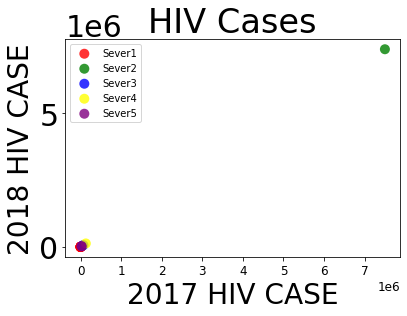

In [45]:
# Visulaize  Clusters 
title = 'HIV Cases'
xlabel = '2017 HIV CASE'
ylabel = '2018 HIV CASE'
plot_cluster(hiv_frame1,title,xlabel,ylabel)

In [19]:
print(hiv_frame)
print(covid_frame)

[('Afghanistan', 0), ('Italy', 3), ('Kuwait', 0), ('India', 0), ('US', 1), ('South Africa', 2), ('United Kingdom', 0), ('Sri Lanka', 2), ('Chile', 0), ('Norway', 0), ('New Zealand', 0), ('Switzerland', 4), ('Australia', 0), ('Canada', 0), ('China', 0), ('Slovenia', 0), ('North Macedonia', 4)]
[('Afghanistan', 3), ('Italy', 2), ('Kuwait', 3), ('India', 2), ('US', 1), ('South Africa', 0), ('United Kingdom', 4), ('Sri Lanka', 3), ('Chile', 0), ('Norway', 3), ('New Zealand', 3), ('Switzerland', 3), ('Australia', 3), ('Canada', 0), ('China', 2), ('Slovenia', 3), ('North Macedonia', 3)]


# Main Cluster for Prediction

## Main Mega Frame Formation

In [20]:
final_frame = np.concatenate([covid_frame,hiv_frame], axis=1)
final_frame = final_frame[:,[0,1,3]]

In [21]:
print(final_frame)

[['Afghanistan' '3' '0']
 ['Italy' '2' '3']
 ['Kuwait' '3' '0']
 ['India' '2' '0']
 ['US' '1' '1']
 ['South Africa' '0' '2']
 ['United Kingdom' '4' '0']
 ['Sri Lanka' '3' '2']
 ['Chile' '0' '0']
 ['Norway' '3' '0']
 ['New Zealand' '3' '0']
 ['Switzerland' '3' '4']
 ['Australia' '3' '0']
 ['Canada' '0' '0']
 ['China' '2' '0']
 ['Slovenia' '3' '0']
 ['North Macedonia' '3' '4']]


In [22]:
clustering = KMeans(n_clusters=5, random_state=0).fit(final_frame[:,[1,2]])
clustering.labels_
clus = list(clustering.labels_)
final_Clus_frame = list(zip(countries,clus))
print(final_Clus_frame)
final_Clus_frame1 = list(zip(final_frame[:,[1]].tolist(),final_frame[:,[2]].tolist(),clus))
print(final_Clus_frame1)

[('Afghanistan', 1), ('Italy', 2), ('Kuwait', 1), ('India', 1), ('US', 0), ('South Africa', 0), ('United Kingdom', 1), ('Sri Lanka', 2), ('Chile', 3), ('Norway', 1), ('New Zealand', 1), ('Switzerland', 4), ('Australia', 1), ('Canada', 3), ('China', 1), ('Slovenia', 1), ('North Macedonia', 4)]
[(['3'], ['0'], 1), (['2'], ['3'], 2), (['3'], ['0'], 1), (['2'], ['0'], 1), (['1'], ['1'], 0), (['0'], ['2'], 0), (['4'], ['0'], 1), (['3'], ['2'], 2), (['0'], ['0'], 3), (['3'], ['0'], 1), (['3'], ['0'], 1), (['3'], ['4'], 4), (['3'], ['0'], 1), (['0'], ['0'], 3), (['2'], ['0'], 1), (['3'], ['0'], 1), (['3'], ['4'], 4)]


([['1'], ['0']], [['1'], ['2']])
([['3'], ['3'], ['2'], ['4'], ['3'], ['3'], ['3'], ['2'], ['3']], [['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['0']])
([['2'], ['3']], [['3'], ['2']])
([['0'], ['0']], [['0'], ['0']])
([['3'], ['3']], [['4'], ['4']])


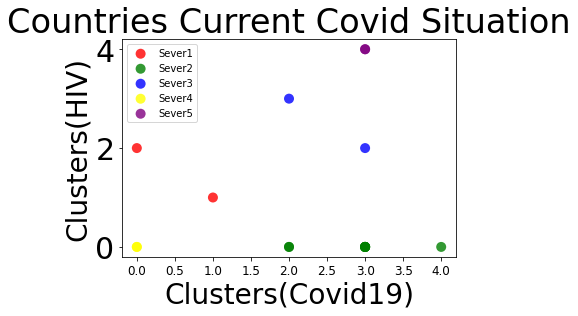

In [44]:
# Visulaize  Clusters 
title = 'Countries Current Covid Situation'
xlabel = 'Clusters(Covid19)'
ylabel = 'Clusters(HIV)'
plot_cluster(final_Clus_frame1,title,xlabel,ylabel)

# Vaccine Dosage Prediction

## For Now 

### Sever 1 = 20%
### Sever 2 = 40%
### Sever 3 = 60%
### Sever 4 = 80%
### Sever 5 = 100%

# Minimum  Vaccine Dosage Requirment Calcualtion

In [24]:
final_Clus_frame

[('Afghanistan', 1),
 ('Italy', 2),
 ('Kuwait', 1),
 ('India', 1),
 ('US', 0),
 ('South Africa', 0),
 ('United Kingdom', 1),
 ('Sri Lanka', 2),
 ('Chile', 3),
 ('Norway', 1),
 ('New Zealand', 1),
 ('Switzerland', 4),
 ('Australia', 1),
 ('Canada', 3),
 ('China', 1),
 ('Slovenia', 1),
 ('North Macedonia', 4)]

In [25]:
set(Population_Data_Countires_Wise['Country'])

{'Afghanistan',
 'Africa',
 'African Group',
 'African Union',
 'African Union: Central Africa',
 'African Union: Eastern Africa',
 'African Union: Northern Africa',
 'African Union: Southern Africa',
 'African Union: Western Africa',
 'African, Caribbean and Pacific (ACP) Group of States',
 'Albania',
 'Algeria',
 'Andean Community',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Asia-Pacific Economic Cooperation (APEC)',
 'Asia-Pacific Group',
 'Association of Southeast Asian Nations (ASEAN)',
 'Australia',
 'Australia/New Zealand',
 'Austria',
 'Azerbaijan',
 'BRIC',
 'BRICS',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Belt-Road Initiative (BRI)',
 'Belt-Road Initiative: Africa',
 'Belt-Road Initiative: Asia',
 'Belt-Road Initiative: Europe',
 'Belt-Road Initiative: Latin America and the Caribbean',
 'Belt-Road Initiative: Pacific',
 'Benin',
 'Bhutan',
 'Black Sea Economic Cooperation (BSEC)',
 'Boliva

In [27]:
Population_Data_Countires_Wise_complete = Population_Data_Countires_Wise
# Covid Data 
Population_Data_Countires_Wise_complete = np.array(Population_Data_Countires_Wise_complete)
Population_Data_Countires_Wise_complete[:,[9,10,11]]

array([[139.66899999999998, 154.91299999999995, 294.582],
       [131.916, 141.851, 273.767],
       [125.127, 130.632, 255.759],
       ...,
       [0.006, 0.043, 0.049],
       [0.002, 0.015, 0.017],
       [0.002, 0.018000000000000002, 0.02]], dtype=object)

In [28]:
countries = ['Afghanistan','Korea, South ','Russia' ,'Italy' , 'Kuwait', 'India' , 'United States of America', 'South Africa' , 
             'United Kingdom','Sri Lanka', 'Chile' , 'Norway', 'New Zealand' ,'Switzerland', 
'Australia', 'Canada', 'China','Slovenia','North Macedonia','Bolivia']

In [30]:
Population_Data_Countires_Wise_complete = Population_Data_Countires_Wise
# Covid Data 
Population_Data_Countires_Wise_complete = np.array(Population_Data_Countires_Wise_complete)
Population_Data_Countires_Wise_complete[:,[9,10,11]] = np.array(Population_Data_Countires_Wise_complete[:,[9,10,11]]).astype(int)
selected_countries = np.zeros(shape=(1,4)) 
data_pop = Population_Data_Countires_Wise_complete
filter3 = []
for i in countries:
    filter3.clear()
    for j in range(0,len(data_pop[:,0])):
            if(data_pop[j,1] == i):
                filter3.append(True)
            else:
                filter3.append(False)
    Population_Data_Countires_Wise_complete = data_pop[filter3]
    for j in range(0,len(Population_Data_Countires_Wise_complete[:,0])):
                if(Population_Data_Countires_Wise_complete[j,1] == i):
                    val1 = ((sum(Population_Data_Countires_Wise_complete[:,9]))/len(Population_Data_Countires_Wise_complete[:,[9]]))
                    val2 = ((sum(Population_Data_Countires_Wise_complete[:,10]))/len(Population_Data_Countires_Wise_complete[:,[10]]))
                    val3 = ((sum(Population_Data_Countires_Wise_complete[:,11]))/len(Population_Data_Countires_Wise_complete[:,[11]]))
                    selected_countries = np.append(selected_countries,[str(i),int(val1),int(val2),int(val3)])
                    selected_countries = selected_countries.reshape((int(len(selected_countries)/4)),4)
                    break;
selected_countries   = selected_countries[1:,[0,1,2,3]]


print(selected_countries)

[['Afghanistan' '85' '80' '167']
 ['Italy' '265' '280' '546']
 ['Kuwait' '8' '6' '15']
 ['India' '4176' '3872' '8048']
 ['United States of America' '1187' '1221' '2409']
 ['South Africa' '164' '167' '331']
 ['United Kingdom' '275' '290' '567']
 ['Sri Lanka' '76' '75' '152']
 ['Chile' '60' '61' '122']
 ['Norway' '20' '20' '41']
 ['New Zealand' '15' '16' '32']
 ['Switzerland' '31' '32' '64']
 ['Australia' '78' '78' '157']
 ['Canada' '126' '127' '254']
 ['China' '5287' '5004' '10292']
 ['Slovenia' '8' '8' '17']
 ['North Macedonia' '8' '8' '17']]


In [31]:
final_Clus_frame = np.concatenate([final_Clus_frame,selected_countries], axis=1)

In [32]:
print(selected_countries)

[['Afghanistan' '85' '80' '167']
 ['Italy' '265' '280' '546']
 ['Kuwait' '8' '6' '15']
 ['India' '4176' '3872' '8048']
 ['United States of America' '1187' '1221' '2409']
 ['South Africa' '164' '167' '331']
 ['United Kingdom' '275' '290' '567']
 ['Sri Lanka' '76' '75' '152']
 ['Chile' '60' '61' '122']
 ['Norway' '20' '20' '41']
 ['New Zealand' '15' '16' '32']
 ['Switzerland' '31' '32' '64']
 ['Australia' '78' '78' '157']
 ['Canada' '126' '127' '254']
 ['China' '5287' '5004' '10292']
 ['Slovenia' '8' '8' '17']
 ['North Macedonia' '8' '8' '17']]


In [33]:
final_Clus_frame = final_Clus_frame[:,[0,1,3,4,5]]
print(final_Clus_frame)

[['Afghanistan' '1' '85' '80' '167']
 ['Italy' '2' '265' '280' '546']
 ['Kuwait' '1' '8' '6' '15']
 ['India' '1' '4176' '3872' '8048']
 ['US' '0' '1187' '1221' '2409']
 ['South Africa' '0' '164' '167' '331']
 ['United Kingdom' '1' '275' '290' '567']
 ['Sri Lanka' '2' '76' '75' '152']
 ['Chile' '3' '60' '61' '122']
 ['Norway' '1' '20' '20' '41']
 ['New Zealand' '1' '15' '16' '32']
 ['Switzerland' '4' '31' '32' '64']
 ['Australia' '1' '78' '78' '157']
 ['Canada' '3' '126' '127' '254']
 ['China' '1' '5287' '5004' '10292']
 ['Slovenia' '1' '8' '8' '17']
 ['North Macedonia' '4' '8' '8' '17']]


In [34]:
M_Vaccine_dosage = []
F_Vaccine_dosage = []
T_Vaccine_dosage = []

for i in final_Clus_frame:
    if int(i[1]) == 0:
        M_Vaccine_dosage.append(int(i[2])*0.2)
        F_Vaccine_dosage.append(int(i[3])*0.2)
        T_Vaccine_dosage.append(int(i[4])*0.2)
    elif int(i[1]) == 1:
        M_Vaccine_dosage.append(int(i[2])*0.4)
        F_Vaccine_dosage.append(int(i[3])*0.4)
        T_Vaccine_dosage.append(int(i[4])*0.4)
        
    elif int(i[1]) == 2:
        M_Vaccine_dosage.append(int(i[2])*0.6)
        F_Vaccine_dosage.append(int(i[3])*0.6)
        T_Vaccine_dosage.append(int(i[4])*0.6)
    elif int(i[1]) == 3:
        M_Vaccine_dosage.append(int(i[2])*0.8)
        F_Vaccine_dosage.append(int(i[3])*0.8)
        T_Vaccine_dosage.append(int(i[4])*0.8)
        
    elif int(i[1]) == 4:
        M_Vaccine_dosage.append(int(i[2])*1.0)
        F_Vaccine_dosage.append(int(i[3])*1.0)
        T_Vaccine_dosage.append(int(i[4])*1.0)


        

In [35]:
final_Clus_dataframe = pd.DataFrame(final_Clus_frame , 
columns=['Country','Cluster','Male_Populstion','Female_Population','Total_Population'])

final_Clus_dataframe['Min_Covid_Vaccine_for_Male'] = M_Vaccine_dosage
final_Clus_dataframe['Min_Covid_Vaccine_for_Female'] = F_Vaccine_dosage
final_Clus_dataframe['Min_Covid_Vaccine_for_total'] = T_Vaccine_dosage

print(M_Vaccine_dosage)

print(F_Vaccine_dosage) 

print(T_Vaccine_dosage)

final_Clus_dataframe








[34.0, 159.0, 3.2, 1670.4, 237.4, 32.800000000000004, 110.0, 45.6, 48.0, 8.0, 6.0, 31.0, 31.200000000000003, 100.80000000000001, 2114.8, 3.2, 8.0]
[32.0, 168.0, 2.4000000000000004, 1548.8000000000002, 244.20000000000002, 33.4, 116.0, 45.0, 48.800000000000004, 8.0, 6.4, 32.0, 31.200000000000003, 101.60000000000001, 2001.6000000000001, 3.2, 8.0]
[66.8, 327.59999999999997, 6.0, 3219.2000000000003, 481.8, 66.2, 226.8, 91.2, 97.60000000000001, 16.400000000000002, 12.8, 64.0, 62.800000000000004, 203.20000000000002, 4116.8, 6.800000000000001, 17.0]


Country Cluster Male_Populstion Female_Population  \
0       Afghanistan       1              85                80   
1             Italy       2             265               280   
2            Kuwait       1               8                 6   
3             India       1            4176              3872   
4                US       0            1187              1221   
5      South Africa       0             164               167   
6    United Kingdom       1             275               290   
7         Sri Lanka       2              76                75   
8             Chile       3              60                61   
9            Norway       1              20                20   
10      New Zealand       1              15                16   
11      Switzerland       4              31                32   
12        Australia       1              78                78   
13           Canada       3             126               127   
14            China       1            5287              5004   
15         Slovenia       1               8                 8   
16  North Macedonia       4               8                 8   

   Total_Population  Min_Covid_Vaccine_for_Male  Min_Covid_Vaccine_for_Female  \
0               167                        34.0                          32.0   
1               546                       159.0                         168.0   
2                15                         3.2                           2.4   
3              8048                      1670.4                        1548.8   
4              2409                       237.4                         244.2   
5               331                        32.8                          33.4   
6               567                       110.0                         116.0   
7               152                        45.6                          45.0   
8               122                        48.0                          48.8   
9                41                         8.0                           8.0   
10               32                         6.0                           6.4   
11               64                        31.0                          32.0   
12              157                        31.2                          31.2   
13              254                       100.8                         101.6   
14            10292                      2114.8                        2001.6   
15               17                         3.2                           3.2   
16               17                         8.0                           8.0   

    Min_Covid_Vaccine_for_total  
0                          66.8  
1                         327.6  
2                           6.0  
3                        3219.2  
4                         481.8  
5                          66.2  
6                         226.8  
7                          91.2  
8                          97.6  
9                          16.4  
10                         12.8  
11                         64.0  
12                         62.8  
13                        203.2  
14                       4116.8  
15                          6.8  
16                         17.0

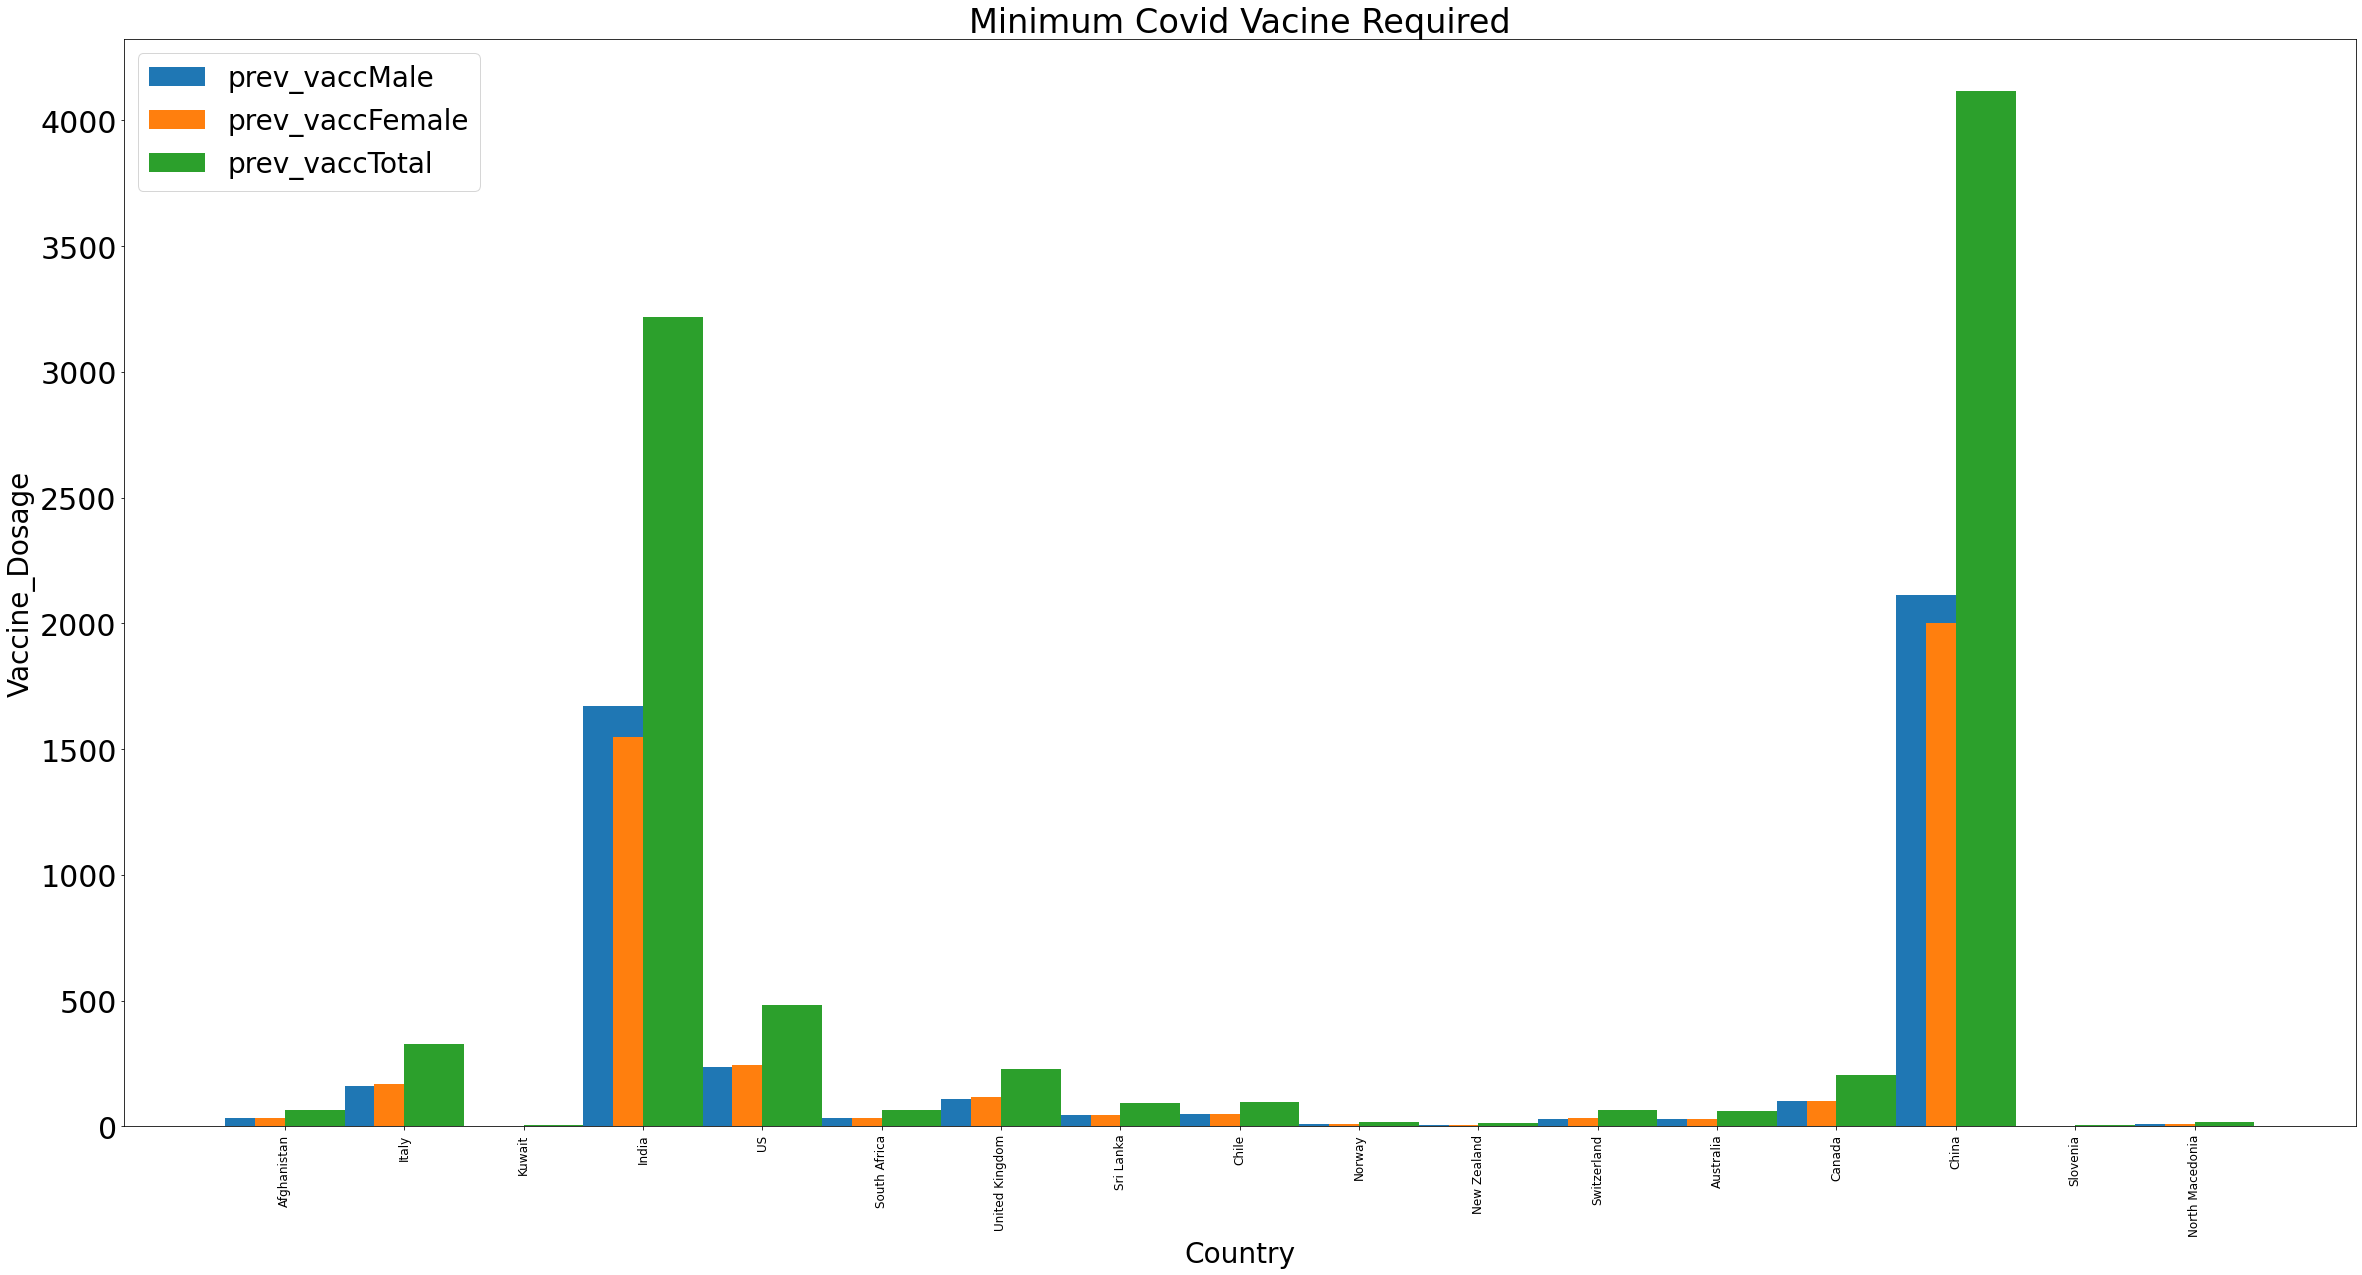

In [36]:
## Visualisation
ylab = "Vaccine_Dosage"
xlab = "Country"


df = final_Clus_dataframe
            

labels = df['Country']
prev_vaccMale = df['Min_Covid_Vaccine_for_Male']
prev_vaccFemale = df['Min_Covid_Vaccine_for_Female']
prev_vaccTotal = df['Min_Covid_Vaccine_for_total']
        
title1 = 'Minimum Covid Vacine Required'
         
#high = int(max(prev_2018))
#low = 0  

x = np.arange(len(labels))  # the x label locations 
width = .50  # the width of the bars
fig, ax = plt.subplots(figsize=(40,20))
rects1 = ax.bar(x-width/2, prev_vaccMale, width, label='prev_vaccMale')
rects2 = ax.bar(x, prev_vaccFemale, width, label='prev_vaccFemale')
rects3 = ax.bar(x+width/2, prev_vaccTotal, width, label='prev_vaccTotal')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(ylab)
ax.set_xlabel(xlab)
ax.set_title(title1)
ax.set_xticks(x)
#ax.set_yticks(y)
plt.xticks(rotation=90) 
#plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
ax.set_xticklabels(labels)
ax.legend()

    
    
plt.show()